# Gamow Peak

Figure 5.3 from Chapter 5 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of the Boltzman and Gamow factors for hydrogen gas at $T = 1.6 \times 10^7 {\rm\,K}$.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig5_3.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Calculation

The Boltzmann factor is:
$$
F_{\rm mb} = \exp\left(-{E\over kT}\right)
$$
The Gamow factor is:
$$
F_{\rm g} = \exp\left(-\sqrt{E_G\over E}\right)
$$
where $E_G$ is the Gamow Energy:
$$
E_G = \pi^2 \alpha^2 Z_1^2 Z_2^2 ( 2 m c^2 )
$$
where $\alpha \approx 1/137$ is the fine structure constant.

For a proton-proton fusion, $Z_1 = Z_2 = 1$ and $m = m_p / 2$, and $E_G(pp)=\pi^2\alpha^2m_p c^2 = 493{\rm\,keV}$


In [3]:
# pp Gamow energy

EG = 493. # keV

# Temperature

T = 1.6e7 # K
k = 8.6173303e-8 # Boltzman constant in keV/K

# Range of energies in keV

E = np.linspace(1.0,100.0,501)

Boltz = np.exp(-E/(k*T))
Gamow = np.exp(-np.sqrt(EG/E))
Total = Boltz*Gamow

# limits

minE = 1.0 # keV
maxE = 100.0
minY = 1.0e-12 # dimensionless
maxY = 1.0

## Figure 5.3

Plot is log-log.  Boltzmann factor is plotted as a dotted curve, Gamow factor as a dashed curve, and the Boltzman$\times$Gamow product is the solid curve.

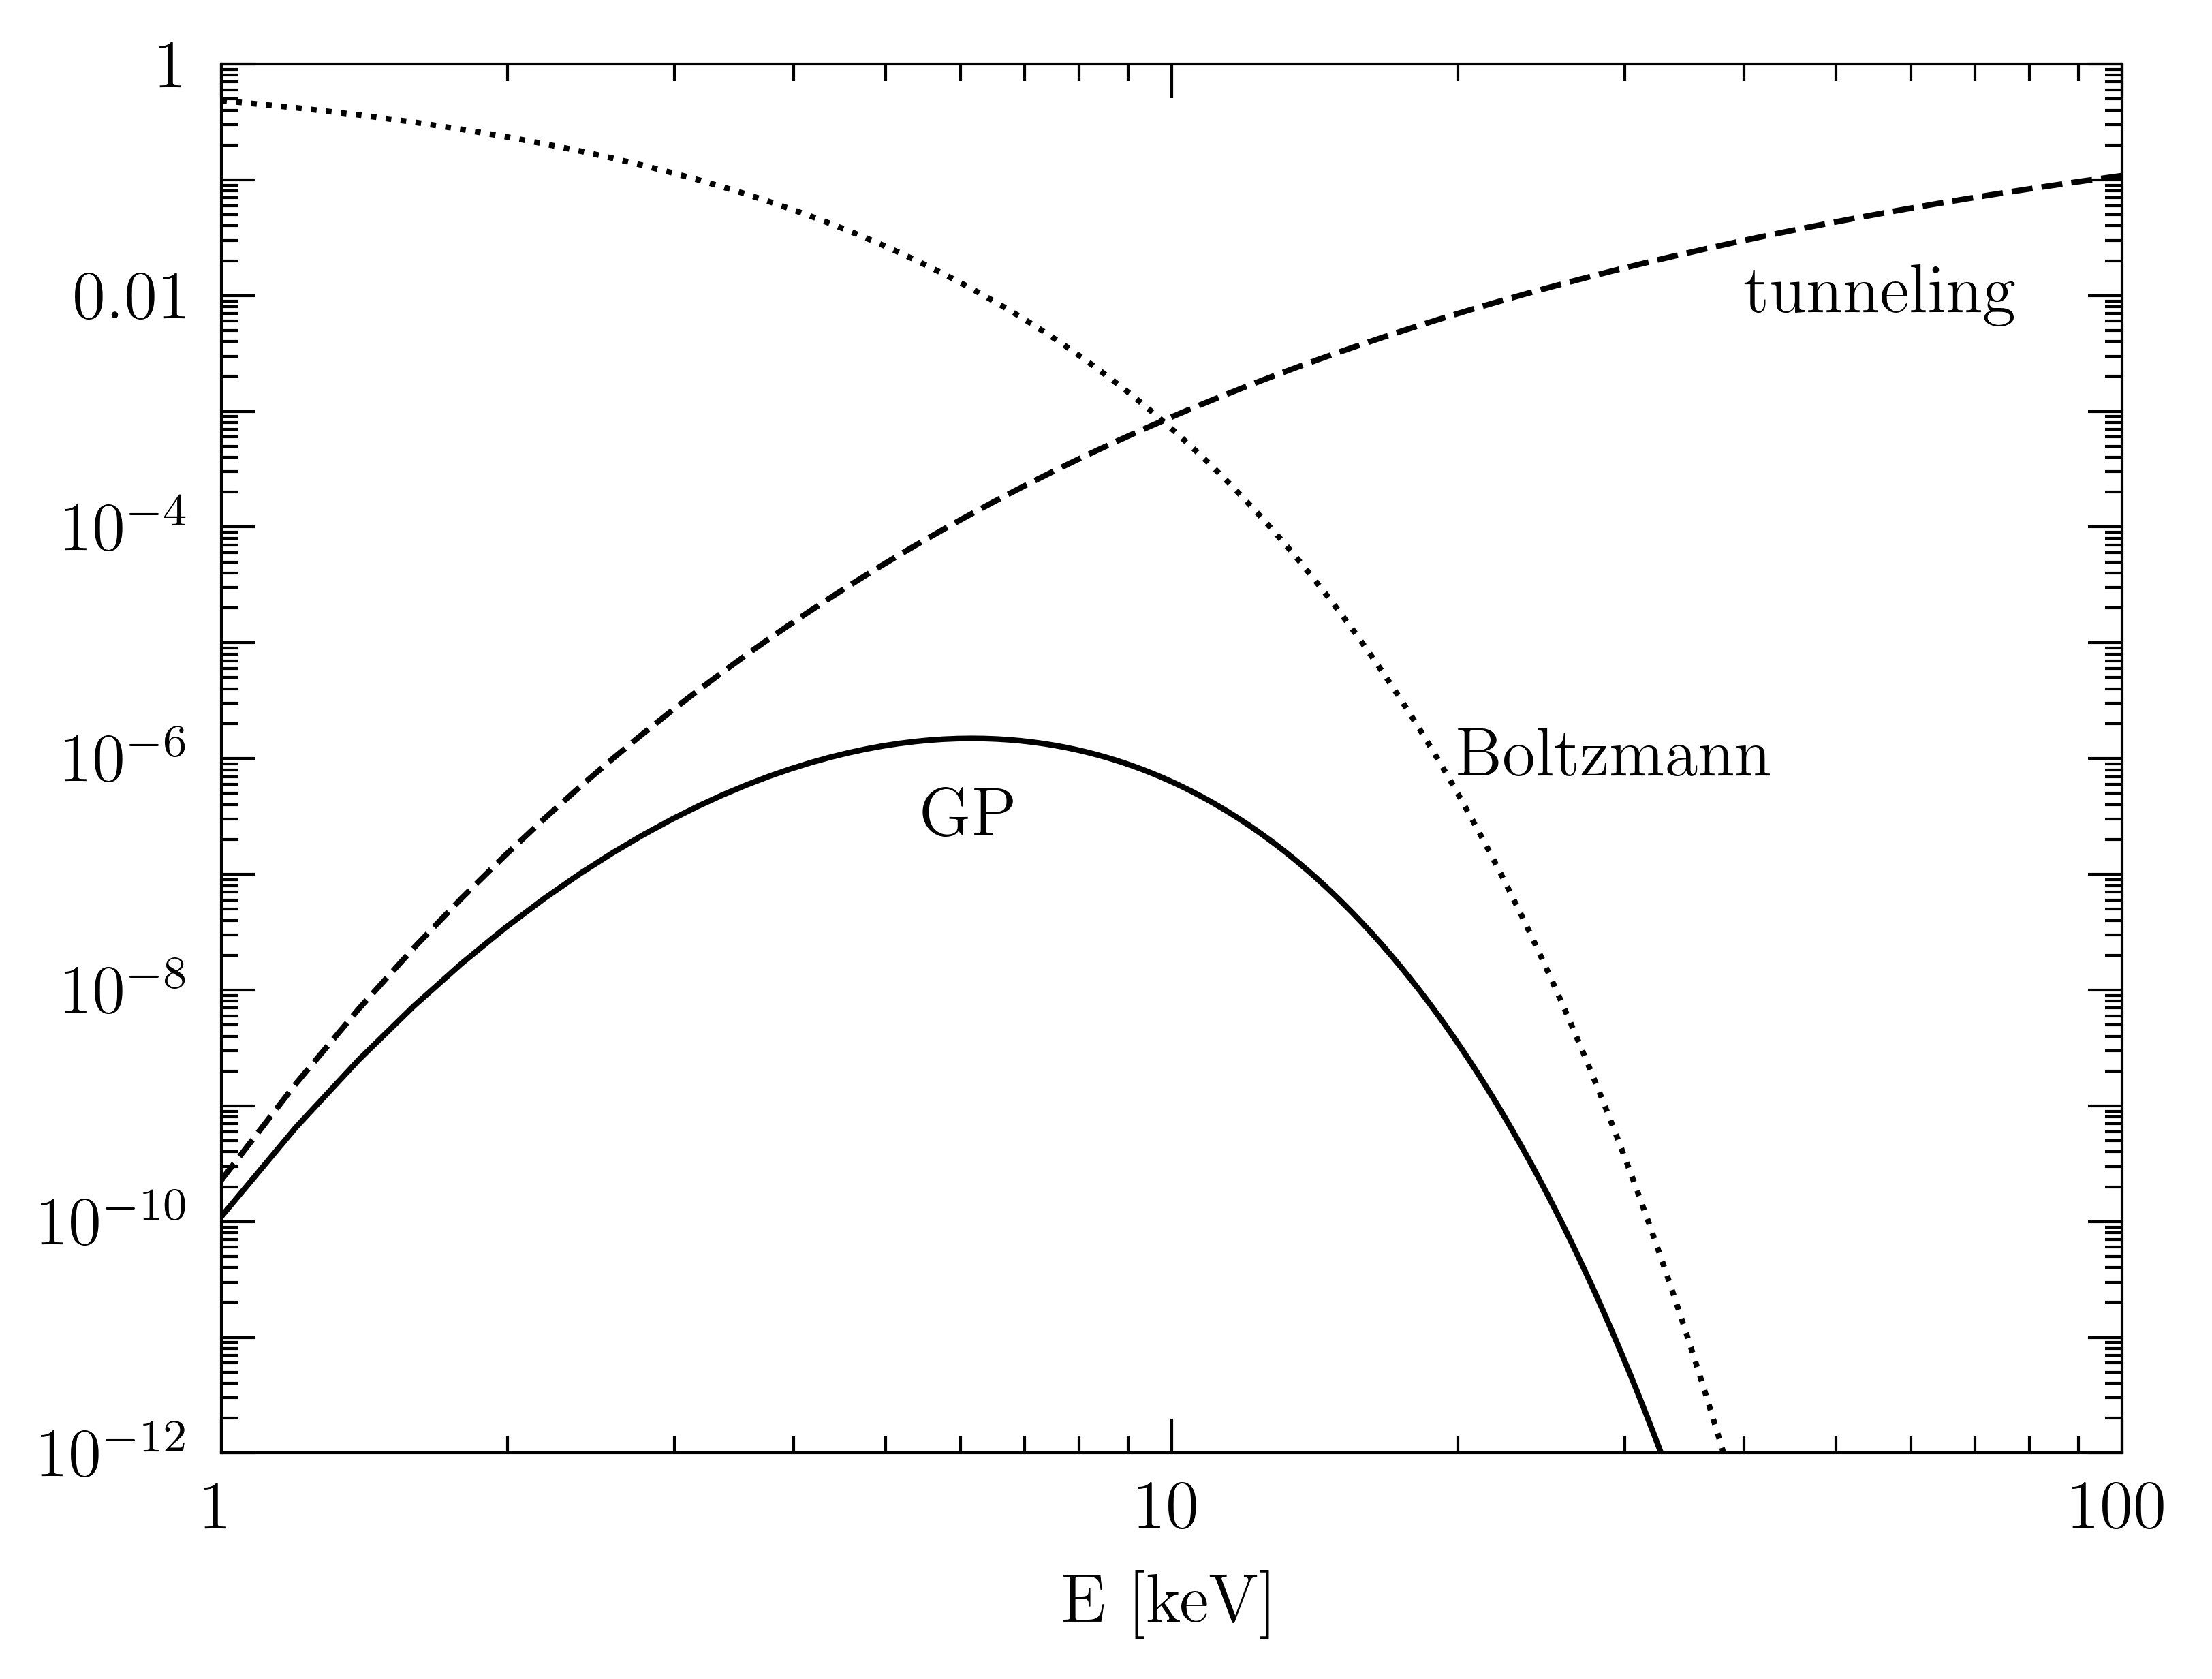

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)
ax.set_xlim(minE,maxE)
ax.set_xlabel(r'E [keV]',fontsize=axisFontSize)
ax.set_xscale('log')
ax.set_xticks([1.,10.,100.])
ax.set_xticklabels(['1','10','100'])

ax.set_ylim(minY,maxY)
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([1.0E-12,1.0E-11,1.0E-10,1.0e-9,1.0E-8,1.0e-7,1.0E-6,1.0e-5,1.0e-4,0.001,0.01,0.1,1.0])
ax.set_yticklabels(['10$^{-12}$',' ','10$^{-10}$',' ','10$^{-8}$',' ','10$^{-6}$',' ','10$^{-4}$',' ',
                    '0.01',' ','1'])

# Boltzmann Factor

ax.plot(E,Boltz,':',color='black',lw=1)
ax.text(20.0,1e-6,'Boltzmann',color='black',fontsize=axisFontSize,ha='left',va='center')

# Gamow Factor

ax.plot(E,Gamow,'--',color='black',lw=1)
ax.text(40.0,0.01,'tunneling',color='black',fontsize=axisFontSize,ha='left',va='center')

# Product Boltzmann * Gamow

ax.plot(E,Total,'-',color='black',lw=1)
ax.text(E[np.where(Total==np.max(Total))],0.2*np.max(Total),'GP',va='center',ha='center',fontsize=axisFontSize)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')